Found 17120 images belonging to 5 classes.
Found 4277 images belonging to 5 classes.


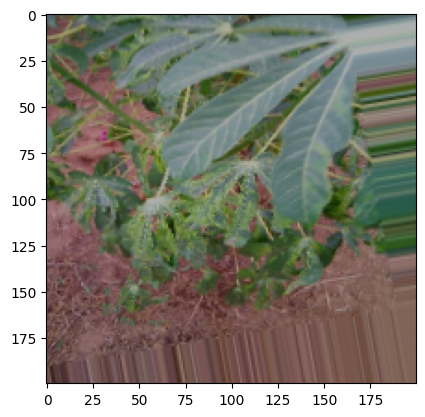

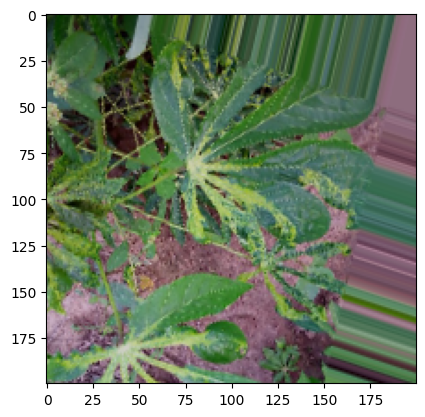

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       3

/tmp/ipykernel_19/105573657.py:143: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_of_train = model.fit_generator(


Epoch 1/30
107/107 [==============================] - 882s 8s/step - loss: 1.1911 - accuracy: 0.6117 - val_loss: 1.2273 - val_accuracy: 0.6152
Epoch 2/30
107/107 [==============================] - 701s 7s/step - loss: 1.1254 - accuracy: 0.6150 - val_loss: 1.1246 - val_accuracy: 0.6156
Epoch 3/30
107/107 [==============================] - 707s 7s/step - loss: 1.0719 - accuracy: 0.6248 - val_loss: 1.0829 - val_accuracy: 0.6332
Epoch 4/30
107/107 [==============================] - 699s 7s/step - loss: 1.0207 - accuracy: 0.6349 - val_loss: 1.0132 - val_accuracy: 0.6369
Epoch 5/30
107/107 [==============================] - 694s 6s/step - loss: 0.9980 - accuracy: 0.6388 - val_loss: 0.9918 - val_accuracy: 0.6462
Epoch 6/30
107/107 [==============================] - 740s 7s/step - loss: 0.9582 - accuracy: 0.6506 - val_loss: 0.9320 - val_accuracy: 0.6556
Epoch 7/30
107/107 [==============================] - 694s 6s/step - loss: 0.9397 - accuracy: 0.6580 - val_loss: 0.9461 - val_accuracy: 0.6549

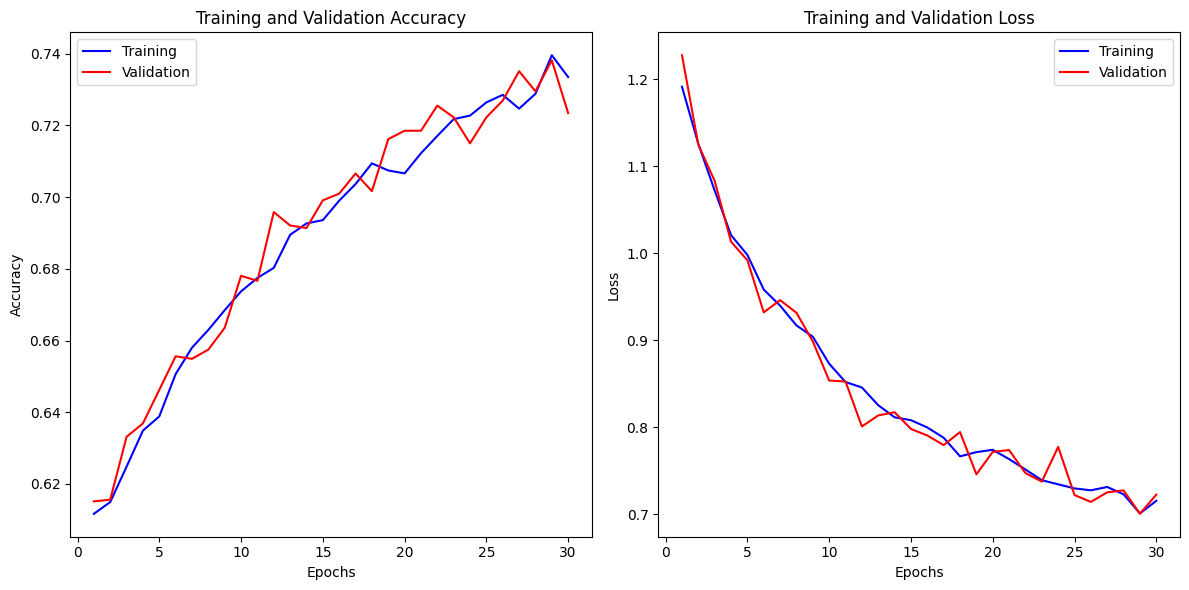

50/50 [==============================] - 105s 2s/step - loss: 0.7150 - accuracy: 0.7300
Test Loss: 0.7150211334228516
Test Accuracy: 0.7299509048461914


In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

image_size = 200
data_dir = os.path.join('/kaggle/input/cassava-leaf-disease-classification/data')
batch_size = 160
rescale_factor = 1./255

def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Crear un generador para aumentar datos
train_datagen = ImageDataGenerator(
    rescale=rescale_factor,    # Normalizar los valores de los píxeles
    shear_range=0.2,   # Rango para las transformaciones aleatorias
    zoom_range=0.2,    # Rango para el zoom aleatorio
    horizontal_flip=True, # Activar el giro horizontal aleatorio
    validation_split=0.2, # Establecer el porcentaje de imágenes para el conjunto de validación
    width_shift_range=0.2,  
    height_shift_range=0.2,
    rotation_range=40,
    brightness_range=[0.2, 1.0],
    fill_mode='nearest'
)

# Cargar imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    data_dir,      # Directorio con datos
    target_size=(image_size, image_size), # Cambiar el tamaño de las imágenes a 50x50
    batch_size=batch_size,
    class_mode='categorical', # 'binary' para clasificación binaria, 'categorical' para multiclase
    subset='training') # Seleccionar solo el conjunto de entrenamiento

# Cargar imágenes de validación
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # Seleccionar solo el conjunto de validación



# ver imagenes
x_batch, y_batch = next(train_generator)
for i in range (0, 2):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()


model = Sequential()
# Capas convolucionales
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3))) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 3 canales de color
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3))) # 3 canales de color
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 3 canales de color

#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 3 canales de color
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 3 canales de color
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten()) # Aplanar la salida de la capa convolucional

# Capas fully connected (clasificador)
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))

#model.add(Dropout(0.5))  # Dropout antes de la capa de salida
model.add(Dense(64, activation='relu'))

model.add(Dense(5, activation='softmax'))


print(model.summary())


from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # 'patience' es el número de épocas sin mejora después de las cuales el entrenamiento se detendrá

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 30

# Entrenar el modelo con Early Stopping
history_of_train = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [early_stopping]
)

generatePlot(history_of_train)


# Evaluar el modelo en el conjunto de validación (usado aquí como prueba)
# Puedes limitar el número de pasos para usar solo una parte del conjunto
test_loss, test_accuracy = model.evaluate(validation_generator, steps=50)  # 'steps' es el número de lotes a evaluar

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")